In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras import regularizers


Using TensorFlow backend.


In [25]:
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [ ]:
traindf.shape, traindf.head()

In [ ]:
testdf.shape, testdf.head()

In [ ]:
# df = pd.concat([testdf, traindf], axis = 0)
# df.reset_index(inplace = True, drop = True)
# df

In [3]:
labelstr = traindf['label']
traindf.drop(columns =['label'], inplace = True)
traindf.shape, labelstr.head()

((27455, 784), 0     3
 1     6
 2     2
 3     2
 4    13
 Name: label, dtype: int64)

In [26]:
labelstt = testdf['label']
testdf.drop(columns =['label'], inplace = True)
testdf.shape, labelstt.head()

((7172, 784), 0     6
 1     5
 2    10
 3     0
 4     3
 Name: label, dtype: int64)

In [ ]:
# no 9(J) or 25(Z)
labelstr.value_counts()

In [ ]:
# label_binrizer = LabelBinarizer()
# labels = label_binrizer.fit_transform(labels)

In [5]:
images = traindf.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [6]:
images = images/255

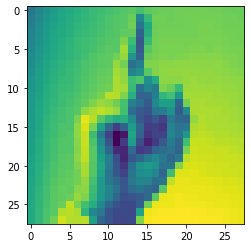

In [7]:
plt.imshow(images[0].reshape(28,28))

In [8]:
labelstr[0]

3

In [9]:
image_train, image_val, label_train, label_val = train_test_split(images, labelstr, random_state=23, train_size=.8)

In [10]:
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_val = keras.utils.to_categorical(label_val, num_classes)

In [ ]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

#  MLP

## Relu

In [ ]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

histoire = model.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
visualize_training_results(histoire)

In [ ]:
results_test1 = model.evaluate(imagestest, labelstt)

In [ ]:
results_test1

## Softmax

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [ ]:
model2.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history = model2.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
visualize_training_results(history)

In [ ]:
results_test2 = model2.evaluate(imagestest, labelstt)

In [ ]:
results_test2

### Hypertuning

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.005),))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(25, activation='softmax'))

model3.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
results_test3 = model3.evaluate(imagestest, labelstt)

In [ ]:
results_test3

# CNN

In [15]:
image_train  = np.array([np.reshape(i, (28, 28)) for i in image_train])
image_val  = np.array([np.reshape(i, (28, 28)) for i in image_val])


In [14]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv1D(32, (3), activation='relu',
                        input_shape=(28, 28)))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(32, (4), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(64, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

# modelcnn.add(layers.Conv1D(128, (3), activation='relu', data_format='channels_first'))
# modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dropout(.1))

modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [16]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 20,
                      batch_size=32,
                      validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 6s 261us/step - loss: 3.1698 - accuracy: 0.0784 - val_loss: 3.0981 - val_accuracy: 0.1100
Epoch 2/20
21964/21964 [==============================] - 5s 250us/step - loss: 2.8668 - accuracy: 0.1510 - val_loss: 2.4856 - val_accuracy: 0.2358
Epoch 3/20
21964/21964 [==============================] - 5s 210us/step - loss: 2.3093 - accuracy: 0.2682 - val_loss: 2.0945 - val_accuracy: 0.3488
Epoch 4/20
21964/21964 [==============================] - 6s 257us/step - loss: 1.8982 - accuracy: 0.3835 - val_loss: 1.6493 - val_accuracy: 0.4935
Epoch 5/20
21964/21964 [==============================] - 6s 291us/step - loss: 1.5759 - accuracy: 0.4816 - val_loss: 1.3428 - val_accuracy: 0.5749
Epoch 6/20
21964/21964 [==============================] - 5s 212us/step - loss: 1.2991 - accuracy: 0.5703 - val_loss: 1.0175 - val_accuracy: 0.6740
Epoch 7/20
21964/21964 [==============================] - 4s 19

In [ ]:
visualize_training_results(results)

# Evaluating 

In [27]:
imagestest = testdf.values
imagestest = np.array([np.reshape(i, (28, 28)) for i in imagestest])
imagestest = np.array([i.flatten() for i in imagestest])
imagestest = imagestest/255

In [28]:
labelstt = keras.utils.to_categorical(labelstt, num_classes)

In [29]:
imagestest  = np.array([np.reshape(i, (28, 28)) for i in imagestest])

In [30]:
results_testcnn = modelcnn.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 1s 86us/step


In [31]:
results_testcnn

[0.9662367537164748, 0.7745398879051208]